# PROJECT NAME: CREDIT CARD FRAUD DETECTION.

## CONTEXT:

In this project we will be implemeting anamoly detection to detect if the transction is a fraud or normal transction.

## ABOUT THE DATA: 

The Dataset contains transctions made by credit card in september by European customers.
In this dataset we have only 492 FRAUD transctions out of 284,807 transctions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

This data downloaded from kaggle contains only numerical input variables which are the result of a PCA transformation because of the confidentiality issue, Original feature and background information is not provided in this data. Feature V1,V2,V3,...,V28 are the components obtained from PCA. 'Time' and 'Amount' are the only feature not transformed with PCA. Feature 'Time' contains the seconds elapsed between each transction. Feature 'Amount' is the transction amount. Feature class is a response variable and it takes value '1' in case of Fraud and '0' in case of Normal. 

## OBJECTIVE

The objectie is to detect whether a transaction is a normal transaction or a fraudulent transaction. Implementing SMOTE (synthetic minority oversampling technique) to solve the imbalance problem so that the model does not exhibit bias toward the majority class, resulting in poor predictions for the minority class. Predict how the model performs with Decision Tree and Random forest by applying some of the Hyperparameters.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
ccf_df = pd.read_csv('creditcard.csv')
ccf_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
ccf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
ccf_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
ccf_df.shape

(284807, 31)

In [6]:
#Create independent and Dependent Features
columns = ccf_df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = ccf_df[columns]
Y = ccf_df[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


## Exploratory Data Analysis

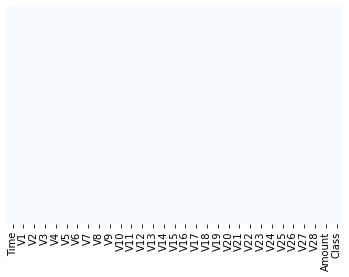

In [7]:
# checking for Null values
sns.heatmap(ccf_df.isnull(),yticklabels=False, cbar=False, cmap='Blues')
plt.show()

The dataset is free from null values. 

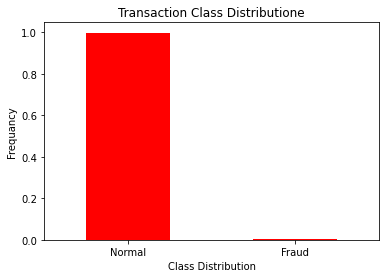

In [8]:
ccf_df['Class'].value_counts(normalize= True).plot(kind= 'bar',rot=0,color='r')
labels= ["Normal","Fraud"]
plt.xticks(range(2), labels)
plt.xlabel("Class Distribution")
plt.ylabel("Frequancy")
plt.title("Transaction Class Distributione");

## Insights

We have a pretty Imbalanced data, Which may result in several issues. Models may be biased in favor of the majority class, which would lead to inaccurate projections for the minority class. Since accuracy can seem high even when the model performs poorly on the minority class, it can be a misleading evaluation metric.


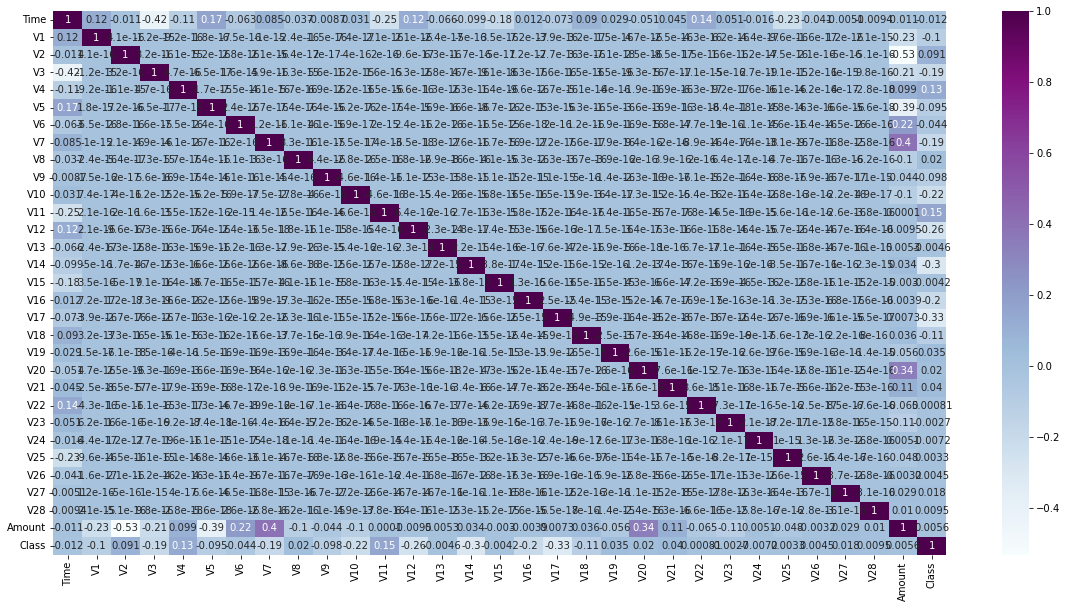

In [9]:
# Create the heatmap of the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(ccf_df.corr(),cmap='BuPu',annot=True)
plt.show()

In [10]:
fraud= ccf_df[ccf_df['Class']==1]
normal= ccf_df[ccf_df['Class']==0]

In [11]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


## Implementing SMOTE for Imbalanced dataset.
We will be using SMOTE - One way to resolve the imbalanced dataset is through SMOTE (synthetic minority oversampling technique). By duplicating minority class cases at random, it seeks to achieve class distribution parity. SMOTE creates new minority cases by combining preexisting ones.

In [12]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
#SMOTE (synthetic minority oversampling technique) to handle imbalanced data
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [14]:
smote =SMOTE (random_state=42,sampling_strategy=0.5)

In [15]:
X_train_res, y_train_res = smote.fit_resample(X,Y)

In [16]:
X_train_res.shape,y_train_res.shape

((426472, 30), (426472,))

In [17]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 142157})


In [18]:
X=np.array(X_train_res)
y=np.array(y_train_res)

## Splitting data into Train and Test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
X_train.shape

(298530, 30)

In [22]:
X_test.shape

(127942, 30)

## Training model with Decision Tree


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier(max_depth=10,min_samples_split=5,min_samples_leaf=5,max_features='sqrt',random_state=42,ccp_alpha=0.05,max_leaf_nodes=60,min_impurity_decrease=0.05,class_weight='balanced')

### Hyperparameters Used:


#### 1) max_depth - Maximum depth of the tree.

#### 2) min_samples_split - Minimum number of samples required to split an internal node.

#### 3) min_samples_leaf - Minimum number of samples required to be at a leaf node.

#### 4) max_features - Number of features to consider for the best split at each node.

#### 5) random_state - Seed for controlling randomness and ensuring reproducibility.

#### 6) ccp_alpha - Complexity parameter used for Minimal Cost-Complexity Pruning. 

#### 7) max_leaf_nodes - Grow a tree with a maximum number of leaf nodes.

#### 8) min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

#### 9) class_weight - Weights associated with classes. Useful for handling imbalanced datasets.

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05, class_weight='balanced', max_depth=10,
                       max_features='sqrt', max_leaf_nodes=60,
                       min_impurity_decrease=0.05, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

In [26]:
y_pred = dtree.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay

In [29]:
score_dtree = accuracy_score(y_test,y_pred)
score_dtree

0.8957574525957074

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     85455
           1       0.78      0.95      0.86     42487

    accuracy                           0.90    127942
   macro avg       0.88      0.91      0.89    127942
weighted avg       0.91      0.90      0.90    127942



In [31]:
confusion_matrix(y_test,y_pred)

array([[74372, 11083],
       [ 2254, 40233]], dtype=int64)

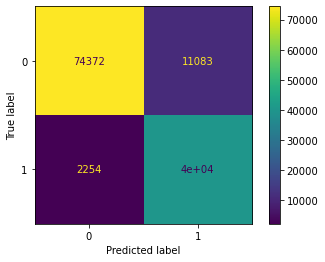

In [32]:
ConfusionMatrixDisplay.from_estimator(

    dtree,
    X_test,
    y_test
    
);

In [33]:
acc_train = dtree.score(X_train , y_train)
acc_test = dtree.score(X_test , y_test)

print(f"Training accuracy: {round(acc_train , 3)}")
print(f"test accuracy: {round(acc_test , 3)}")

Training accuracy: 0.896
test accuracy: 0.896


## Training the Model with Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc =RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5, min_samples_leaf=5,max_features='sqrt',random_state=101,ccp_alpha=0.1,max_samples=50,min_impurity_decrease=0.1)

### Hyperparameters used:


#### 1) n_estimators - Number of trees in the forest.

#### 2) max_depth - Maximum depth of the tree.

#### 3) min_samples_split - Minimum number of samples required to split an internal node.

#### 4) min_samples_leaf - Minimum number of samples required to be at a leaf node.

#### 5) max_features - Number of features to consider for the best split at each node.

#### 6) random_state - Seed for controlling randomness and ensuring reproducibility.

#### 7) ccp_alpha - Complexity parameter used for Minimal Cost-Complexity Pruning. 

#### 8) max_samples - The number of samples to draw from the dataset to build each tree.

#### 9) min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [36]:
rfc.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.1, max_depth=10, max_features='sqrt',
                       max_samples=50, min_impurity_decrease=0.1,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=101)

In [37]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
score_rfc = accuracy_score(y_test,y_pred)
score_rfc

0.9471870066123712

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     85455
           1       1.00      0.84      0.91     42487

    accuracy                           0.95    127942
   macro avg       0.96      0.92      0.94    127942
weighted avg       0.95      0.95      0.95    127942



In [40]:
confusion_matrix(y_test,y_pred)

array([[85429,    26],
       [ 6731, 35756]], dtype=int64)

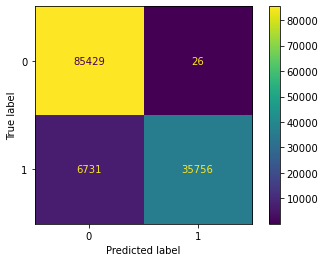

In [41]:
ConfusionMatrixDisplay.from_estimator(

    rfc,
    X_test,
    y_test
    
);

In [42]:
acc_train = rfc.score(X_train , y_train)
acc_test = rfc.score(X_test , y_test)

print(f"Training accuracy: {round(acc_train , 3)}")
print(f"test accuracy: {round(acc_test , 3)}")

Training accuracy: 0.947
test accuracy: 0.947
